In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
file_path = '/content/LDA_results.4.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

In [3]:
# Step 2: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        LDA1      LDA2      LDA3      LDA4  label
0   1.921664 -2.674763  0.172239 -2.628960     12
1 -10.100228  4.409782  0.407498  0.368238     15
2   5.899996  1.645313  1.683837  1.771158     17
3   0.811099 -0.890581 -1.683839 -5.819650      4
4   8.778212  9.201870 -7.135024 -3.891139     14


In [4]:
# Step 3: Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

No missing values detected.


In [5]:
# Step 4: Separate features and labels
if 'label' in data.columns:
    features = data.drop(columns=['label'])  # Dropping the label column
    labels = data['label']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the dataset contains a 'label' column.")

Features and labels separated successfully.


In [6]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (112, 4)
Testing set size: (28, 4)


In [7]:
# Step 6: Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)  # Adjust max_iter for convergence
print("Initialized Logistic Regression model.")

Initialized Logistic Regression model.


In [8]:
# Step 7: Train the Logistic Regression model
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Step 8: Make predictions on the test set
y_pred = log_reg.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [10]:
# Step 9: Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy: {accuracy:.2f}")


Logistic Regression Model Accuracy: 0.79


In [11]:
# Step 10: Display the classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       0.50      1.00      0.67         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       0.75      1.00      0.86         3
          17       0.00      0.00      0.00         1
          18       0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


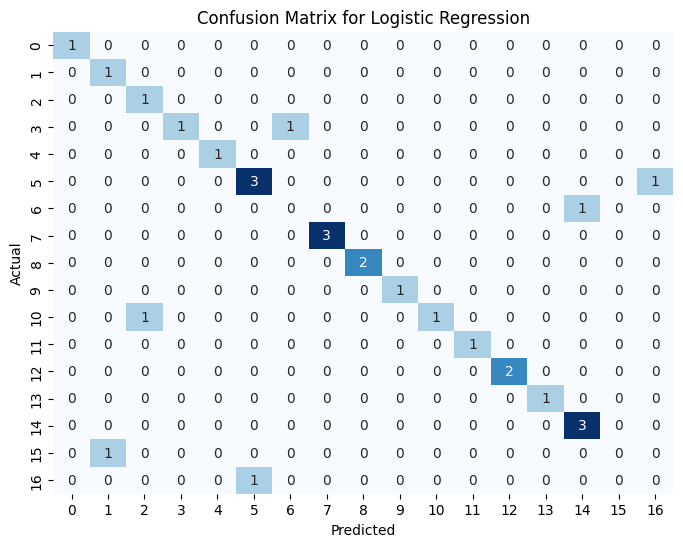

In [15]:
# Step 11: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

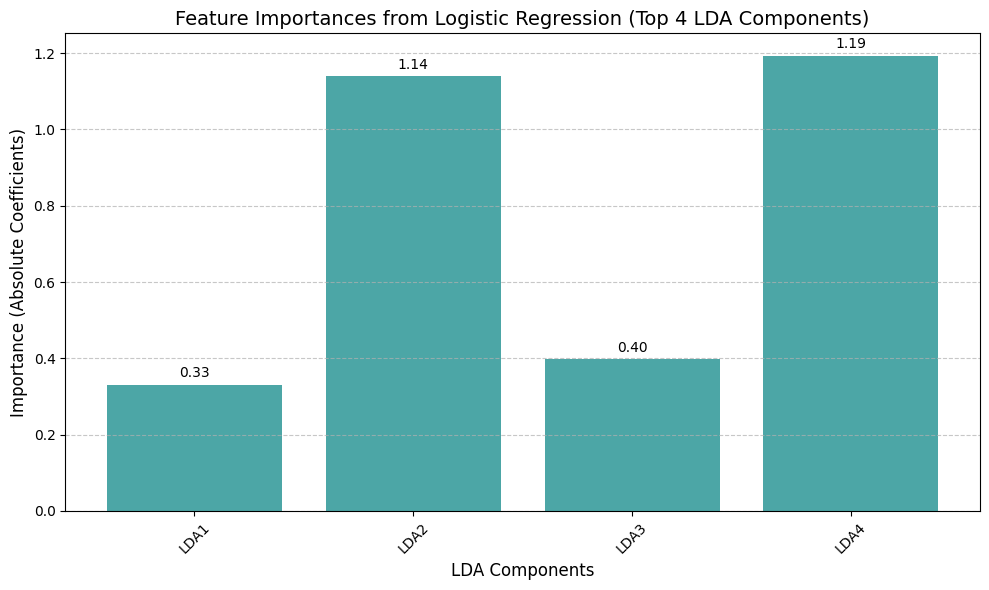

In [18]:
# Step 12: Plot feature importances for LDA components
# Extract coefficients (absolute values) from the trained logistic regression model
coefficients = np.abs(log_reg.coef_[0])  # For binary classification, only one set of coefficients

# Dynamically adjust the number of components to match the coefficients
num_components = len(coefficients)
lda_columns = [f"LDA{i+1}" for i in range(num_components)]  # Generate correct number of labels
feature_importances = coefficients[:num_components]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(lda_columns, feature_importances, color='teal', alpha=0.7)
plt.title(f"Feature Importances from Logistic Regression (Top {num_components} LDA Components)", fontsize=14)
plt.xlabel("LDA Components", fontsize=12)
plt.ylabel("Importance (Absolute Coefficients)", fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()